In [50]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string

In [51]:
# data loader
data_arr = []
with open('data2.txt', 'r') as f:
    
    i = 0
    entry = dict()
    columns = ['flair', 'title', 'selftext', 'date', 'c1', 'c2', 'c3', 'sub_id', 'date_raw', 'permalink']
    
    # read file to create list of dicts
    for line in f:
        if i == 8:
            entry[columns[i]] = int(line[:-3])
        else:
            entry[columns[i]] = line[:-1]
        i+=1
        # end of one entry
        if i == 10:
            data_arr.append(entry)
            entry = dict()
            i = 0
# To check loaded data
print(data_arr[0])
print(data_arr[1])
print(data_arr[2])

{'flair': 'Non-Political', 'title': 'Mumbai man cycling to J K home gets a lift in truck CRPF airlifts ailing father to hospital', 'selftext': '', 'date': '2020-04-08 15:24:08', 'c1': '', 'c2': '', 'c3': '', 'sub_id': 'fx3q5b', 'date_raw': 1586339648, 'permalink': 'https://www.reddit.com/r/india/comments/fx3q5b/mumbai_man_cycling_to_jk_home_gets_a_lift_in/'}
{'flair': 'Coronavirus', 'title': 'Wearing Masks compulsory in Mumbai or get arrested under section of IPC OF', 'selftext': '', 'date': '2020-04-08 15:14:20', 'c1': '', 'c2': '', 'c3': '', 'sub_id': 'fx3ls0', 'date_raw': 1586339060, 'permalink': 'https://www.reddit.com/r/india/comments/fx3ls0/wearing_masks_compulsory_in_mumbai_or_get/'}
{'flair': 'Coronavirus', 'title': 'PM Modi Lifting Coronavirus lockdown does not seem possible', 'selftext': '', 'date': '2020-04-08 15:09:41', 'c1': 'Awesome get ready for another pointless cringey national flashmob to entertain the chaddi pied piper', 'c2': 'I am worried about street cart vendors 

In [52]:
# see the head of the data
df = pd.DataFrame(data_arr)
df.head()

,c1,c2,c3,date,date_raw,flair,permalink,selftext,sub_id,title
0,,,,2020-04-08 15:24:08,1586339648,Non-Political,https://www.reddit.com/r/india/comments/fx3q5b...,,fx3q5b,Mumbai man cycling to J K home gets a lift in ...
1,,,,2020-04-08 15:14:20,1586339060,Coronavirus,https://www.reddit.com/r/india/comments/fx3ls0...,,fx3ls0,Wearing Masks compulsory in Mumbai or get arre...
2,Awesome get ready for another pointless cringe...,I am worried about street cart vendors daily w...,,2020-04-08 15:09:41,1586338781,Coronavirus,https://www.reddit.com/r/india/comments/fx3juh...,,fx3juh,PM Modi Lifting Coronavirus lockdown does not ...
3,,,,2020-04-08 15:07:28,1586338648,AskIndia,https://www.reddit.com/r/india/comments/fx3iyn...,I am stuck here in Noida and I have to go to H...,fx3iyn,People who are traveling in lockdown
4,,,,2020-04-08 15:07:22,1586338642,Coronavirus,https://www.reddit.com/r/india/comments/fx3ixa...,,fx3ixa,Amartya Sen writes Overcoming a pandemic may l...


In [53]:
# Information got:
"""
Datatype:
title: text
selftext: text
permalink: html link
flair:  text
date_raw: int (unix timestamp)
date: date
c1,c2,c3: top level comment 1, 2 and 3 of type text
"""
df.describe()

,date_raw
count,1.020860e+05
mean,1.555981e+09
std,1.637801e+07
min,1.528562e+09
25%,1.541738e+09
50%,1.555400e+09
75%,1.568981e+09
max,1.586340e+09


In [54]:
# Finding types of labels
unique_flair = df['flair'].unique()
print(unique_flair)
print(len(unique_flair))

['Non-Political' 'Coronavirus' 'AskIndia' 'Policy/Economy' 'Photography'
 'Politics' 'Business/Finance' 'Science/Technology' 'Scheduled' 'Sports'
 '| Repost |' 'Food' 'Unverified' 'CAA-NRC-NPR' 'Megathread' 'Meta.'
 '| Unverified Content / Disreputed Source |' '| Social Media Rules |'
 'Policy/Economy [Megathread]' 'Politics [Megathread]' 'Opinion'
 'AMA has Ended' 'Shitpost' 'Demonetization' '| Custom (Informed OP) |'
 'CAA-NRC' 'PARTAYYY AGAIN :D' 'Unverified - NSFL' 'Happy Birthday OP!'
 '| Stickied Topic |' 'Repost' '| Not specific to India |' 'Verified '
 'Politics [18 Dec 2019]' 'None' 'Announcement' 'AMA Announcement' 'DST'
 '| Not in English | | Not Original/Relevant Title |'
 'Politics [Aug 2009]' 'AMA' 'AMA / Unverified'
 "Politics (word is: 'azadi')" '| Not in English |' 'Foodpolitics'
 'Casual AMA' 'Aug 2019 - Politics' 'Politics - Old' 'Moderated'
 'AMA has ended' 'Politics (Translation in comments)'
 'Politics [Very Graphic]' 'Source in comments' 'AskIndia - DST'
 'Megath

In [55]:
# Information got:
"""
I had checked for some kinds of post removals while scraping data,
but a lot of extra flairs still ended in the data, need to delete rows
containing unecessary flairs.
Also I think that flairs with | | are obviously violation of the subreddit rules
Flairs this will run for are (Currently valid flairs on r/india:
Politics
Non-Political
AskIndia
Policy/Economy
Business/Finance
Science/Technology
Scheduled
Sports
Food
Photography
CAA-NRC-NPR
Coronavirus
"""
# Action taken:
"""
Drop rows having invalid flairs
"""

'\nDrop rows having invalid flairs\n'

In [56]:
# Clean data to get only desired labels
valid_flairs = ['Politics', 'Non-Political', 'AskIndia', 'Policy/Economy','Business/Finance','Science/Technology', 'Scheduled', 'Sports', 'Food','Photography','CAA-NRC-NPR', 'Coronavirus']
df = df[df['flair'].isin(valid_flairs)]
unique_flair = df['flair'].unique()
print(unique_flair)
print(len(unique_flair))
df.describe()

['Non-Political' 'Coronavirus' 'AskIndia' 'Policy/Economy' 'Photography'
 'Politics' 'Business/Finance' 'Science/Technology' 'Scheduled' 'Sports'
 'Food' 'CAA-NRC-NPR']
12


,date_raw
count,8.681200e+04
mean,1.556499e+09
std,1.678289e+07
min,1.528562e+09
25%,1.541572e+09
50%,1.555997e+09
75%,1.570421e+09
max,1.586340e+09


In [57]:
# Find number of null values in each column
df.isnull().sum()

c1           0
c2           0
c3           0
date         0
date_raw     0
flair        0
permalink    0
selftext     0
sub_id       0
title        0
dtype: int64

flair: 0 of 86812 entries
title: 25 of 86812 entries
selftext: 69125 of 86812 entries
date: 0 of 86812 entries
c1: 39369 of 86812 entries
c2: 49337 of 86812 entries
c3: 56721 of 86812 entries
sub_id: 0 of 86812 entries
date_raw: 0 of 86812 entries
permalink: 0 of 86812 entries


/usr/lib64/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


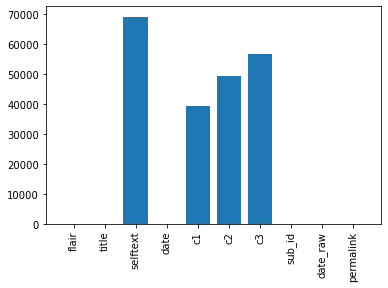

In [58]:
# find number of '' in each column
empty_strings = dict()

for i in columns:
    empty_strings[i] = (df[i] == '').sum()

# pretty print the result
for i in empty_strings:
    print(i, end=": ")
    print(empty_strings[i], end="")
    print(" of {} entries".format(df.shape[0]))
    
# Plot the result as a bar chart
values = [empty_strings[x] for x in columns]
plt.bar(np.arange(len(columns)), values)
plt.xticks(np.arange(len(columns)), columns, rotation=90)
plt.show()

In [59]:
# Information got:
"""
1. some titles are empty, this has happened due to processing text while scraping:
The title may have been purely numeric,
it can also be just a html link,
a username, or a subreddit name,
or just special characters:
the title had not alphabets
2. A lot of selftext is empty, this can be due to:
Only a image, html link as the body,
no alphabets in the post
3. Number of empty top level comments follow expected pattern
number of empty: top level 1 < top level 2 < top level 3
4. Other columns are fine
5. While some reliance on other columns can help, title seems the most useful
"""
# Actions taken
"""
1. Remove all rows having no title
"""

'\n1. Remove all rows having no title\n'

In [60]:
# Remove rows having no title
df = df[df['title'] != '']
df.describe()

,date_raw
count,8.678700e+04
mean,1.556502e+09
std,1.678340e+07
min,1.528562e+09
25%,1.541574e+09
50%,1.555998e+09
75%,1.570426e+09
max,1.586340e+09


Politics: 24473 of 86787
Non-Political: 22319 of 86787
AskIndia: 14400 of 86787
Policy/Economy: 4832 of 86787
Business/Finance: 8186 of 86787
Science/Technology: 4519 of 86787
Scheduled: 569 of 86787
Sports: 2041 of 86787
Food: 1128 of 86787
Photography: 2125 of 86787
CAA-NRC-NPR: 35 of 86787
Coronavirus: 2160 of 86787


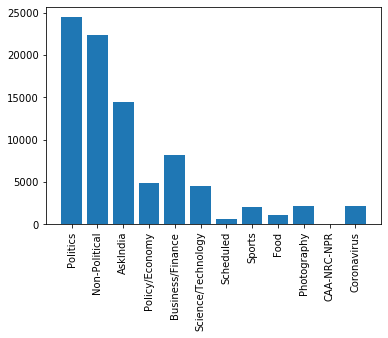

In [61]:
# Count no of data points under all labels
label_count = []
for i in valid_flairs:
    label_count.append((df['flair'] == i).sum())

# Pretty print the data
for i, j in enumerate(valid_flairs):
    print("{}: ".format(j), end='')
    print(label_count[i], end='')
    print(" of {}".format(df.shape[0]))
    
# Plot as bar chart
plt.bar(np.arange(len(valid_flairs)), label_count)
plt.xticks(np.arange(len(valid_flairs)), valid_flairs, rotation=90)
plt.show()

In [62]:
# TODO
# Information got:
"""
1. Some labels dominate the dataset while very little data is available for others
i.e. dataset is imbalanced
Techniques to balance the dataset need to be used
2. Flairs other than Coronavirus, CAA-NRC-NPR and Scheduled can be boosted by 
scraping more data from the past, as Coronavirus and CAA-NRC-NPR are 'events'
and very little data is available for flair scheduled
3. Flair Coronavirus and CAA-NRC-NPR can be boosted by scraping newer posts
"""
# Action taken
"""
Todo: boost some labels,
learn about methods to work with imbalanced datasets
"""

'\nTodo: boost some labels,\nlearn about methods to work with imbalanced datasets\n'

In [63]:
# Count no of words in text columns
print(columns)

title_word_len = []
c1_word_len = []
c2_word_len = []
c3_word_len = []
selftext_word_len = []

index_for_flair = dict()
title_len_by_flair = [[] for i in range(12)]
selftext_len_by_flair = [[] for i in range(12)]

for i, j in enumerate(valid_flairs):
    index_for_flair[j] = i

# TODO choose correct method to count words
for index, row in df.iterrows():
    
    title_word_len.append(len(row['title'].split()))
    c1_word_len.append(sum([x.strip(string.punctuation).isalpha() for x in row['c1'].split()]))
    c2_word_len.append(sum([x.strip(string.punctuation).isalpha() for x in row['c2'].split()]))
    c3_word_len.append(sum([x.strip(string.punctuation).isalpha() for x in row['c3'].split()]))
    selftext_word_len.append(len(row['selftext'].split()))
    
    title_len_by_flair[index_for_flair[row['flair']]].append(title_word_len[-1])
    selftext_len_by_flair[index_for_flair[row['flair']]].append(selftext_word_len[-1])

# pretty print
print('title max:{} min:{} avg:{}'.format(max(title_word_len), min(title_word_len), sum(title_word_len)/len(title_word_len)))
print('c1 max:{} min:{} avg:{}'.format(max(c1_word_len), min(c1_word_len), sum(c1_word_len)/len(c1_word_len)))
print('c2 max:{} min:{} avg:{}'.format(max(c2_word_len), min(c2_word_len), sum(c2_word_len)/len(c2_word_len)))
print('c3 max:{} min:{} avg:{}'.format(max(c3_word_len), min(c3_word_len), sum(c3_word_len)/len(c3_word_len)))
print('selftext max:{} min:{} avg:{}'.format(max(selftext_word_len), min(selftext_word_len), sum(selftext_word_len)/len(selftext_word_len)))

['flair', 'title', 'selftext', 'date', 'c1', 'c2', 'c3', 'sub_id', 'date_raw', 'permalink']
title max:62 min:1 avg:11.555866662057682
c1 max:1778 min:0 avg:20.340039406823603
c2 max:1737 min:0 avg:14.547535921278532
c3 max:1700 min:0 avg:10.912878656941707
selftext max:4644 min:0 avg:26.95850761058684


In [64]:
# Information got:
"""
Max number of words in a title ~62
This is useful info, but I think a frequency line
plot will be much more useful
I expect a gaussian result
"""
# Information found elsewhere:
"""
Reddit has title length limit 300 chars
Selftext ~10k-40k
comments ~10k
"""

'\nReddit has title length limit 300 chars\nSelftext ~10k-40k\ncomments ~10k\n'

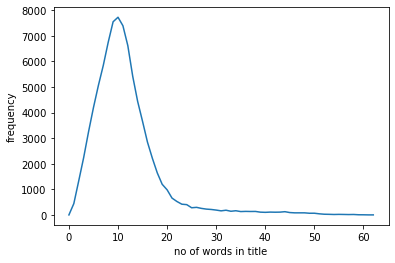

In [65]:
# for title
freq_arr_title = [0 for i in range(0, max(title_word_len)+1)]
for i in title_word_len:
    freq_arr_title[i] += 1
plt.xlabel('no of words in title')
plt.ylabel('frequency')
plt.plot(np.arange(0, max(title_word_len)+1), freq_arr_title)

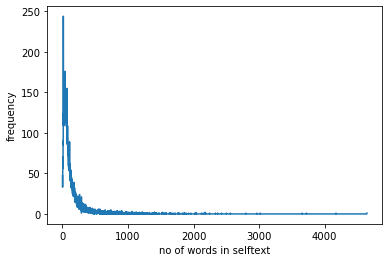

In [66]:
# for selftext
freq_arr_selftext = [0 for i in range(0, max(selftext_word_len)+1)]
for i in selftext_word_len:
    freq_arr_selftext[i] += 1
plt.xlabel('no of words in selftext')
plt.ylabel('frequency')
# lots of selftext with no text influences plot
# plt.plot(np.arange(0, max(selftext_word_len)+1), freq_arr_selftext)
plt.plot(np.arange(1, max(selftext_word_len)+1), freq_arr_selftext[1:])

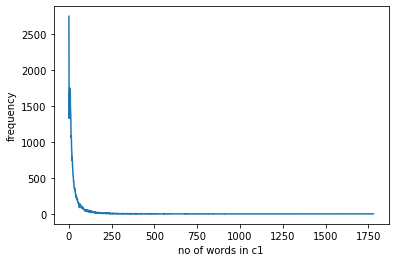

In [67]:
# for c1
freq_arr_c1 = [0 for i in range(0, max(c1_word_len)+1)]
for i in c1_word_len:
    freq_arr_c1[i] += 1
plt.xlabel('no of words in c1')
plt.ylabel('frequency')
plt.plot(np.arange(1, max(c1_word_len)+1), freq_arr_c1[1:])

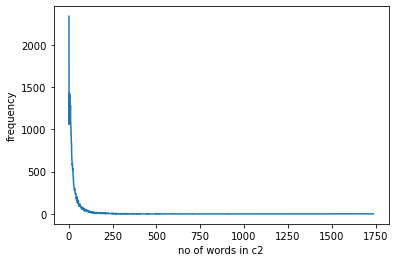

In [68]:
# for c2
freq_arr_c2 = [0 for i in range(0, max(c2_word_len)+1)]
for i in c2_word_len:
    freq_arr_c2[i] += 1
plt.xlabel('no of words in c2')
plt.ylabel('frequency')
plt.plot(np.arange(1, max(c2_word_len)+1), freq_arr_c2[1:])

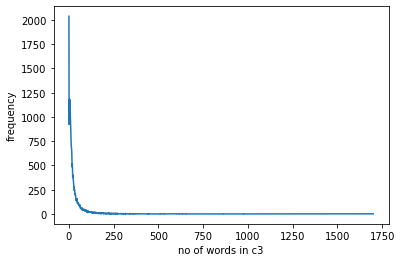

In [69]:
# for c3
freq_arr_c3 = [0 for i in range(0, max(c3_word_len)+1)]
for i in c3_word_len:
    freq_arr_c3[i] += 1
plt.xlabel('no of words in c3')
plt.ylabel('frequency')
plt.plot(np.arange(1, max(c3_word_len)+1), freq_arr_c3[1:])

In [70]:
# Information got:
"""
1. Title cannot exceed 300 words, and using ~100 words should be enough
2. Selftext, comments have lots of null values
3. These 4 also contain lots of outliers, exceeding thousands of words
"""
# Insights:
"""
Need a network that can process ~100-200 words if using only title,
if using rest of the cols, need more input capacity
"""
# Actions taken:
"""
As selftext can be considered part of title, lets check where the
concatenation of both stands
"""

'\nAs selftext can be considered part of title, lets check where the\nconcatenation of both stands\n'

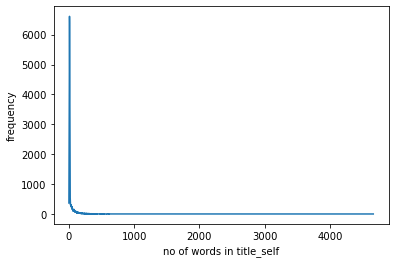

In [71]:
# Testing length for title+selftext
title_self_word_len = [sum(x) for x in zip(title_word_len, selftext_word_len)]
freq_arr_title_self = [0 for i in range(0, max(title_self_word_len)+1)]
for i in title_self_word_len:
    freq_arr_title_self[i] += 1
plt.xlabel('no of words in title_self')
plt.ylabel('frequency')
plt.plot(np.arange(1, max(title_self_word_len)+1), freq_arr_title_self[1:])

In [72]:
# Information got:
"""
1. Adding any column to to title will skew it away from the title
While adding selftext to title can make prediction better, it will
require more resources, or a hybrid approach can be used
Adding comments can help in cases when selftext and title are not enough,
for example 3 words in title and no self text, but problem is 
comments can be unrelated to prediction of flair and can be 'very' long,
thus dominating the input data fed.
"""
# Actions taken:
"""
I'll experiment with different combinations/ truncations of input
While I think I can use a encoder to maybe compress some of the text,
resource requirement while training will increase

Whatever design decision is taken in the end, it will be on thses 5 fields
i.e. title, selftext, c1, c2, and c3
I proceed to analyze the relation of these with the labels
"""

"\nI'll experiment with different combinations/ truncations of input\nWhile I think I can use a encoder to maybe compress some of the text,\nresource requirement while training will increase\n\nWhatever design decision is taken in the end, it will be on thses 5 fields\ni.e. title, selftext, c1, c2, and c3\nI proceed to analyze the relation of these with the labels\n"

12
[13.28582519511298, 11.172588377615485, 10.846180555555556, 12.482822847682119, 9.243220131932567, 10.604558530648374, 7.434094903339192, 11.762371386575209, 9.388297872340425, 9.32235294117647, 13.685714285714285, 13.513425925925926]


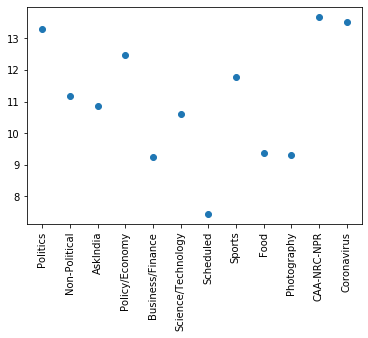

In [85]:
# variation of title length with labels
print(len(valid_flairs))
#print(title_len_by_flair)
title_mean_by_flair = []
title_std_by_flair = []
for i in title_len_by_flair:
    title_mean_by_flair.append(sum(i)/len(i))
    title_std_by_flair.append(np.std(i))
#plt.errorbar(np.arange(12), title_mean_by_flair, title_std_by_flair, linestyle='None', fmt='o')
plt.errorbar(np.arange(12), title_mean_by_flair, [0 for i in range(12)], linestyle='None', fmt='o')
plt.xticks(np.arange(len(valid_flairs)), valid_flairs, rotation=90)
plt.plot()
print(title_mean_by_flair)

[201.20184824902725, 168.31327602674307, 98.3200614124872, 278.8516228748068, 141.48705882352942, 124.99773242630386, 52.286118980169974, 77.83464566929133, 115.33766233766234, 56.84, 0, 170.65693430656935]


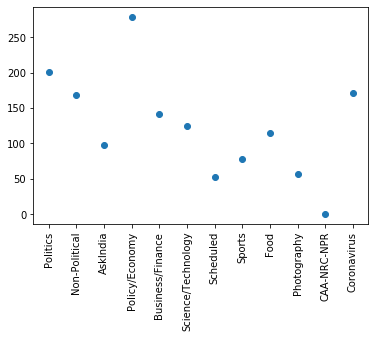

In [83]:
# variation of selftext length with flairs
# here zero length selftexts are ignored, as these push nearly all means to zero
selftext_mean_by_flair = []
selftext_std_by_flair = []
for i in selftext_len_by_flair:
    without_zero = []
    for j in i:
        if j != 0:
            without_zero.append(j)
    if len(without_zero) != 0:
        selftext_mean_by_flair.append(sum(without_zero)/len(without_zero))
        selftext_std_by_flair.append(np.std(without_zero))
    else:
        selftext_mean_by_flair.append(0)
        selftext_std_by_flair.append(0)
#plt.errorbar(np.arange(12), selftext_mean_by_flair, selftext_std_by_flair, linestyle='None', fmt='o')
plt.errorbar(np.arange(12), selftext_mean_by_flair, [0 for i in range(12)], linestyle='None', fmt='o')
plt.xticks(np.arange(len(valid_flairs)), valid_flairs, rotation=90)
plt.plot()
print(selftext_mean_by_flair)

In [ ]:
# Information got:
"""
From plot of title vs label:
Scheduled seems to be in a bad state
From plot of combination vs label:
Scheduled improves, Food gets boosted
There is very little change in Photography and CAA-NRC-NPR
"""